# Lending Club EDA
* Used various kernals to learn and apply information. Practice is the best way to learn so wanted to apply others tactics.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import datetime as datetime
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv("loan.csv", low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


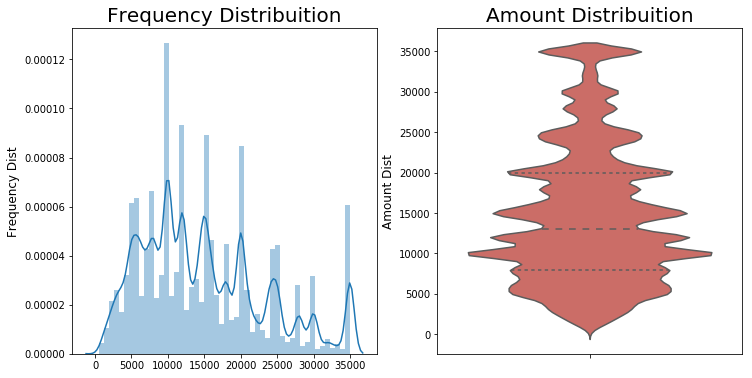

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(data.loan_amnt)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)


plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=data, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

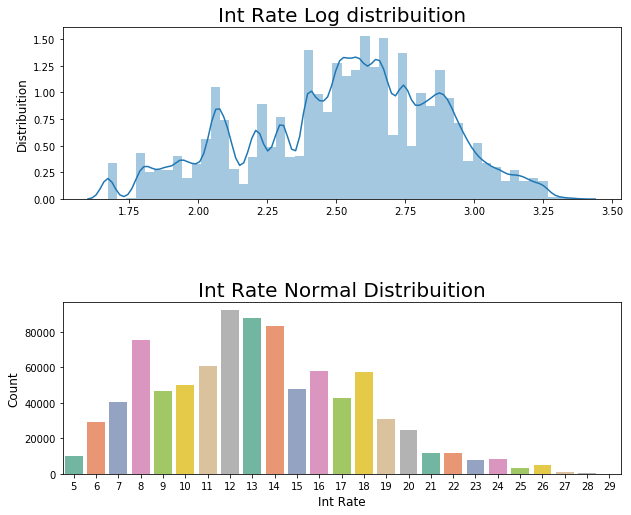

In [15]:
data['int_round'] = data['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

plt.subplot(211)
g = sns.distplot(np.log(data["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=data, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()


In [16]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [17]:
data.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [18]:
data.loc[data.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
data.loc[data.loan_status == 'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

In [19]:
data.loan_status.value_counts()

Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64

Text(0,0.5,'Count')

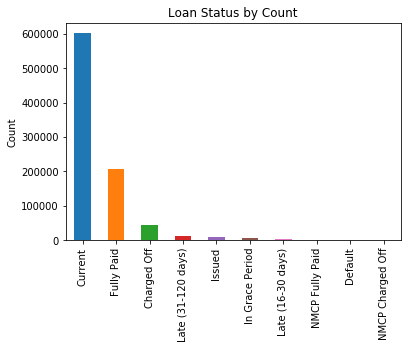

In [20]:
data.loan_status.value_counts().plot(kind="bar", title = "Loan Status by Count")
plt.ylabel("Count")

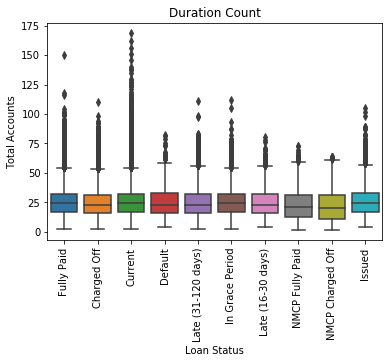

In [21]:
ax1 = sns.boxplot(x="loan_status", y ="total_acc", data = data)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
ax1.set_xlabel("Loan Status")
ax1.set_ylabel("Total Accounts")
ax1.set_title("Duration Count");

Text(0.5,1,'Loan Amount')

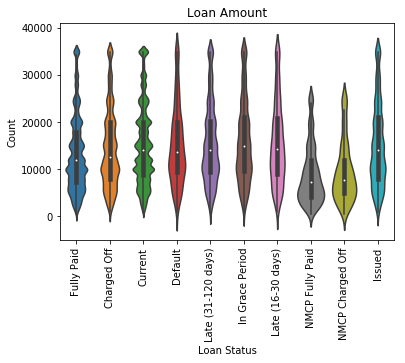

In [26]:
ax2 = sns.violinplot(x="loan_status", y="loan_amnt", data=data)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2.set_xlabel("Loan Status")
ax2.set_ylabel("Count")
ax2.set_title("Loan Amount");

In [28]:
data['issue_month'], data['issue_year'] = data['issue_d'].str.split('-', 1).str

Text(0.5,1,'Defaults by year')

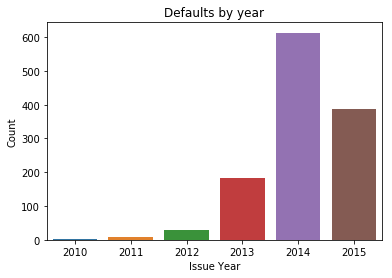

In [32]:
ax3 = sns.countplot(x="issue_year", data=data[data.loan_status == "Default"])
ax3.set_xlabel("Issue Year")
ax3.set_ylabel("Count")
ax3.set_title("Defaults by year")

There is a surpisingly high amount of defaults in 2014. Did something happen during this year?

In [35]:
purp_loan= ['purpose', 'loan_status']
pd.crosstab(data[purp_loan[0]], data[purp_loan[1]]).style


loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days),NMCP Charged Off,NMCP Fully Paid
purpose,,,,,,,,,,
car,448,4937,10,3198,40,81,15,70,13,51
credit_card,7826,149835,233,42250,1150,2071,381,2096,69,271
debt_consolidation,27599,356239,790,120764,3998,4796,1510,7419,292,808
educational,56,1,0,269,0,0,0,0,32,65
home_improvement,2269,34980,47,12660,367,493,137,662,71,143
house,286,1854,7,1366,37,37,15,61,11,33
major_purchase,874,10308,14,5391,125,184,51,207,23,100
medical,569,5324,15,2285,56,91,17,125,22,36
moving,425,3121,11,1603,43,52,23,90,15,31


In [37]:
loan_grade = ['loan_status', 'grade']
pd.crosstab(data[loan_grade[0]], data[loan_grade[1]]).style

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43
Late (31-120 days),492,2004,3339,2890,1852,768,246
NMCP Charged Off,8,85,148,197,158,93,72


Text(0,0.5,'count')

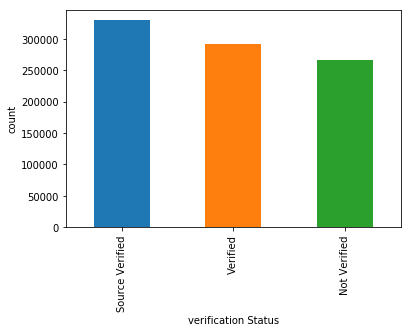

In [40]:
data.verification_status.value_counts().plot(kind="bar")
plt.xlabel("verification Status")
plt.ylabel("count")